In [4]:
#Importing required libraries
#Manages files and directories
import os
import numpy as np # For Numpy Arrays
import matplotlib.pyplot as plt # for graphs
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf

In [ ]:
# Path of our dataset
dataset_dir = 'Dataset\Smart Waste Classifier\garbage_classification'
#List all the image file in the dataset directory
categories = os.listdir(dataset_dir)    

In [6]:
#Loading the images and preprocess them 
image_data = []
labels = []

#Resize images and encode labels
image_size = (224,224)  # Resize image to the standard size

for category in categories:
  category_path = os.path.join(dataset_dir, category)
  class_num = categories.index(category)  #Numeric label for the category
  for image_name in os.listdir(category_path):
    image_path = os.path.join(category_path, image_name)
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=image_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    image_data.append(img_array)
    labels.append(class_num)

In [7]:
# Convert into numpy arrays 
image_data = np.array(image_data) / 255.0
labels = np.array(labels)

In [8]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=42)

In [9]:
#Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

test_datagen = ImageDataGenerator()

In [10]:
#MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

input_layer = Input(shape=(224, 224, 3))
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(len(categories), activation='softmax')(x)
model = Model(inputs=input_layer, outputs=output)


In [11]:
#Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
#Train the model
history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    epochs = 10,
    validation_data = test_datagen.flow(X_test, y_test, batch_size=32)
)

c:\Users\akans\OneDrive\Desktop\Smart Waste Classifier\smart_waste_classifier\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 267s 671ms/step - accuracy: 0.7800 - loss: 0.7237 - val_accuracy: 0.9123 - val_loss: 0.2762
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 356s 917ms/step - accuracy: 0.9168 - loss: 0.2611 - val_accuracy: 0.9169 - val_loss: 0.2689
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 276s 711ms/step - accuracy: 0.9251 - loss: 0.2182 - val_accuracy: 0.9207 - val_loss: 0.2530
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 221s 570ms/step - accuracy: 0.9317 - loss: 0.1883 - val_accuracy: 0.9314 - val_loss: 0.2287
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.9431 - loss: 0.1595 - val_accuracy: 0.9236 - val_loss: 0.2576
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 262s 676ms/step - accuracy: 0.9423 - loss: 0.1680 - val_accuracy: 0.9291 - val_loss: 0.2491
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 252s 649ms/step - accuracy: 0.9547 - loss: 0.1359 - val_accuracy: 0.9323 - val_loss: 0.2394
Epoch 8/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 226s 582ms/step - accuracy: 0.9559 - lo

In [13]:
#Evaluate the model 
y_pred = np.argmax(model.predict(X_test), axis=1)  #Predict lables for the test data
report = classification_report(y_test, y_pred, target_names=categories, output_dict=True)
print(classification_report(y_test, y_pred, target_names=categories))

97/97 ━━━━━━━━━━━━━━━━━━━━ 30s 296ms/step
              precision    recall  f1-score   support

     battery       0.91      0.94      0.92       194
  biological       0.96      0.96      0.96       181
 brown-glass       0.94      0.78      0.86       130
   cardboard       0.95      0.90      0.92       174
     clothes       0.99      0.99      0.99      1087
 green-glass       0.88      0.95      0.91       131
       metal       0.72      0.88      0.79       168
       paper       0.89      0.94      0.92       206
     plastic       0.83      0.85      0.84       180
       shoes       0.96      0.98      0.97       381
       trash       0.96      0.91      0.93       126
 white-glass       0.90      0.70      0.79       145

    accuracy                           0.93      3103
   macro avg       0.91      0.90      0.90      3103
weighted avg       0.94      0.93      0.93      3103



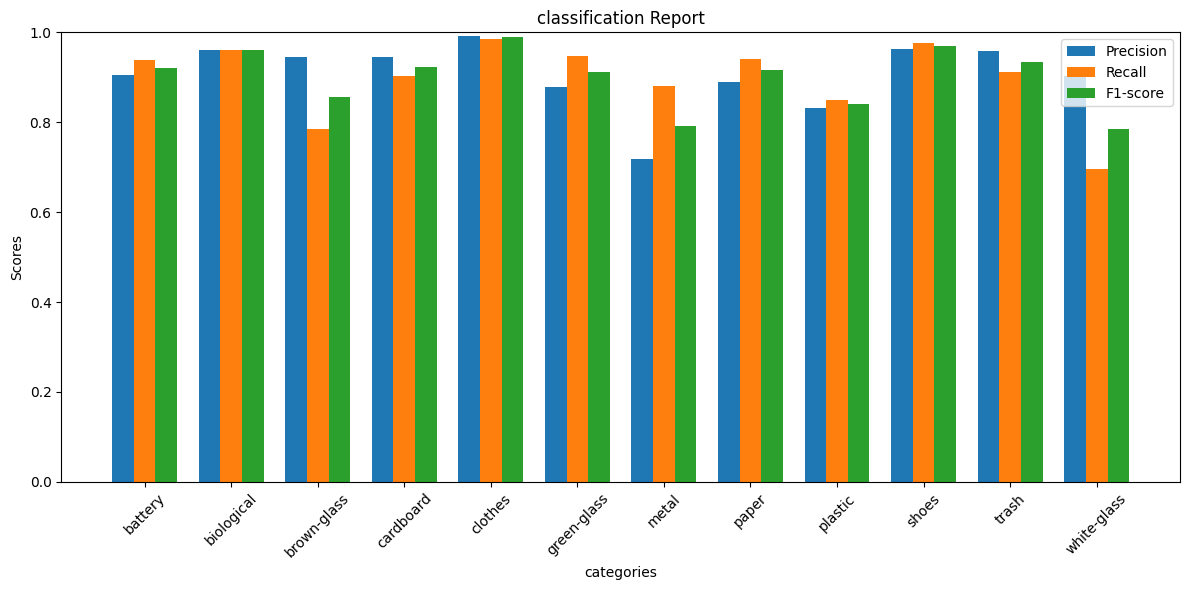

In [15]:
#Prepare data for plottting  
precision = [report[label]['precision'] for label in categories]
recall = [report[label]['recall'] for label in categories]
f1_score = [report[label]['f1-score'] for label in categories]

x = np.arange(len(categories))   #Categories location
width = 0.25  #width of the bars

plt.figure(figsize=(12,6))
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1_score, width, label='F1-score')

#Labels and Title
plt.xlabel('categories')
plt.ylabel('Scores')
plt.title('classification Report')
plt.xticks(ticks=x, labels=categories, rotation=45)
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

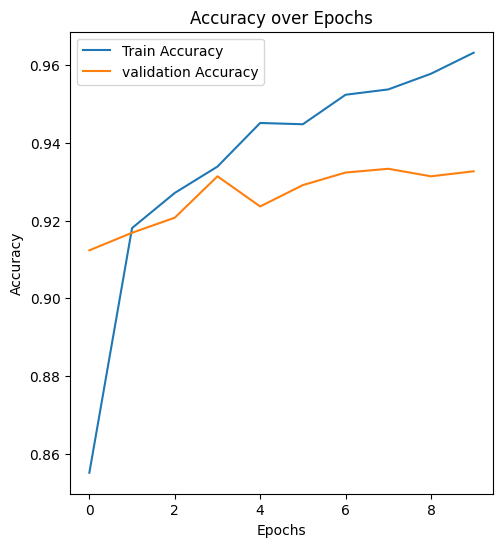

In [16]:
#Plot accuracy and loss graphs
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

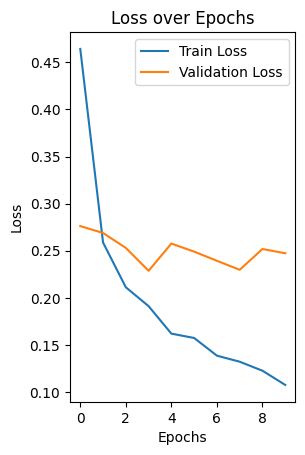

In [17]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model.save('smart_waste_classifier.keras')